In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import interpolate

# Read data from mesa data: 
a = pd.read_excel("ONe6040_helm_update.xlsx")

# Read data after the initial module
f = open("ECSN-ONe6040-final-4e7.hse.10240","r")
data = f.readlines()  # data is a list. each element is a line of "23Ne...dat"
f.close()
del data[0:16]

data2d = []
for i in range(len(data)):
    data2d.append(re.split(r"[ ]",data[i].strip('\n')))

for i in range(len(data2d)):
        while '' in data2d[i]:
            data2d[i].remove('')
#for i in range(len(data2d)-1,-1,-1):
#    if len(data2d[i]) == 3:
##        aaaaa = data2d[i].copy()
#        data2d.pop(i)
#        i+=1
#    else:
#        data2d[i].extend(aaaaa)

data3d = np.array(data2d).astype(np.float)

df = pd.DataFrame(data3d)
df.columns = ['radius','density','temperature','pressure','ne20','o16','o20','mg24','f20','he4','al27','si28','s32','p31','h1']
df.head(2)

,radius,density,temperature,pressure,ne20,o16,o20,mg24,f20,he4,al27,si28,s32,p31,h1
0,1953.125,8.348568e+09,6.565856e+08,7.367390e+27,0.007297,0.599995,0.392705,4.964736e-16,2.021101e-09,8.924601e-23,1.000000e-30,0.000004,1.000000e-30,1.000000e-30,1.000000e-30
1,5859.375,8.348567e+09,6.565856e+08,7.367390e+27,0.007297,0.599995,0.392705,4.964917e-16,2.021106e-09,8.924824e-23,1.000000e-30,0.000004,1.000000e-30,1.000000e-30,1.000000e-30


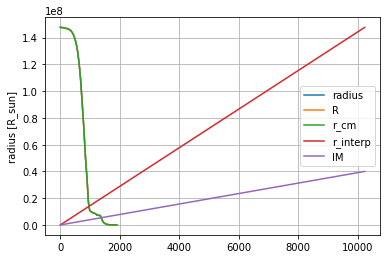

In [2]:
r_sun = 6.955e10  # cm
m_sun = 1.989e33  # gram
radius = np.array(a["radius"])
R = np.power(10,np.array(a["logR"]))
r_cm = np.array(a["radius_cm"])

r_interp = np.linspace(radius[-1], radius[ 0], 10240)

plt.plot(radius*r_sun, label='radius')
plt.plot(R*r_sun, label='R')
plt.plot(r_cm, label='r_cm')
plt.plot(r_interp*r_sun, label='r_interp')


plt.plot(np.array(df['radius']), label='IM')
#plt.plot(df1['radius'],label='rm_plateo')


plt.legend()
plt.xlabel("")
plt.ylabel("radius [R_sun]")
plt.grid()
plt.show()

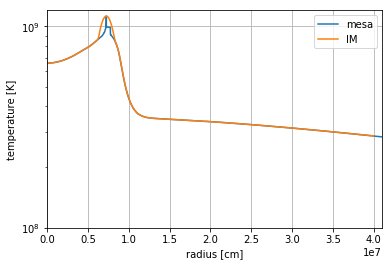

In [9]:
temp = np.array(a["temperature"])
T = np.power(10,np.array(a["logT"]))

#T_interp = np.interp(r_interp, radius[::-1], temp[::-1])
f_interp = interpolate.interp1d(radius[::-1],temp[::-1],kind='nearest')
T_interp = f_interp(r_interp)

plt.semilogy(radius*r_sun,temp,'-',label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df['temperature']), "-",label='IM')
#plt.plot(r_interp*r_sun,T_interp,'s-',label='interp')

plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")

#plt.xlim(7.23e6,7.30e6)
#plt.xlim(585937.5,1367187.5)
plt.xlim(0,4.1e7)
plt.ylim(1e8,1.2e9)
plt.grid()
plt.legend()
plt.show()

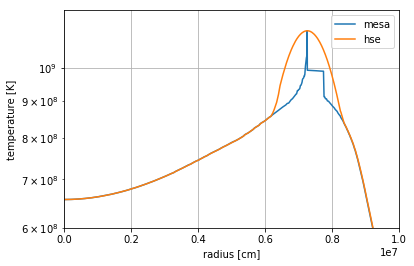

In [4]:
temp = np.array(a["temperature"])
T = np.power(10,np.array(a["logT"]))

T_interp = np.interp(r_interp, radius[::-1], temp[::-1])

plt.semilogy(radius*r_sun,temp,'-', label='mesa')
#plt.semilogy(R*r_sun,T,":")
#plt.semilogy(r_interp,T_interp)

plt.semilogy(np.array(df['radius']),np.array(df['temperature']), "-",label='hse')

plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")
#plt.xlim(7.2e6,8e6)
#plt.xlim(585937.5,1367187.5)
plt.ylim(0.6e9,1.2e9)
plt.xlim(0.4,1e7)
plt.legend()
plt.grid()
#plt.show()
plt.savefig("temp_initial model")

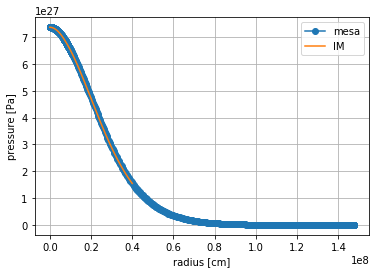

In [10]:
pressure = np.array(a['pressure'])
P = np.power(10,np.array(a["logP"]))

p_interp = np.interp(r_interp, radius[::-1], pressure[::-1])

plt.plot(R*r_sun,pressure, "o-",label='mesa')
#plt.plot(R*r_sun,P)
#plt.plot(r_interp*r_sun,p_interp)

plt.plot(np.array(df['radius']),np.array(df['pressure']),"-",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("pressure [Pa]")

#plt.xlim(0,1000000)
#plt.ylim(6.7e27,7e27)
#plt.xlim(7.2e6,8e6)
#plt.ylim(0.88e9,1.2e9)
plt.legend()
plt.grid()
#plt.show()
#plt.savefig("pressure_initial_model")

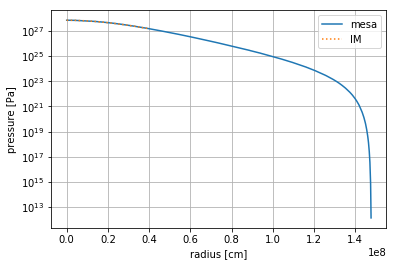

In [11]:
pressure = np.array(a['pressure'])
P = np.power(10,np.array(a["logP"]))

p_interp = np.interp(r_interp, radius[::-1], pressure[::-1])

plt.semilogy(R*r_sun,pressure,label='mesa')
#plt.semilogy(R*r_sun,P)
#plt.semilogy(r_interp*r_sun,p_interp)

plt.semilogy(np.array(df['radius']),np.array(df['pressure']), ":",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("pressure [Pa]")
plt.legend()
#plt.ylim(5e20,2e28)
plt.grid()
plt.show()

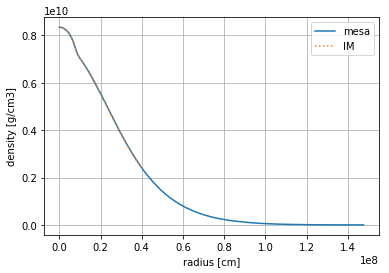

In [12]:
rho = np.power(10,np.array(a["logRho"]))

plt.plot(radius*r_sun,rho,label='mesa')

plt.plot(np.array(df['radius']),np.array(df['density']), ":",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("density [g/cm3]")
plt.legend()
plt.grid()
plt.show()

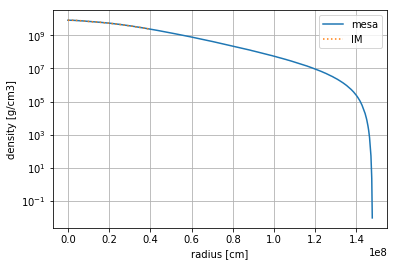

In [13]:
plt.semilogy(radius*r_sun,rho,label='mesa')

plt.semilogy(np.array(df['radius']),np.array(df['density']), ":",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("density [g/cm3]")
plt.grid()
plt.legend()
plt.show()

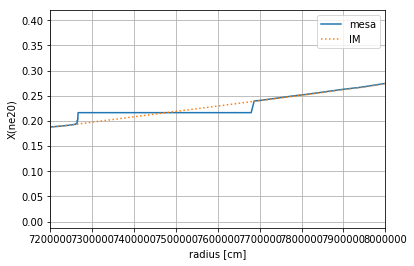

In [14]:
element = 'ne20'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.xlim(585937.5,1367187.5)
plt.xlim(7.2e6,8e6)
plt.grid()
plt.legend()
plt.show()

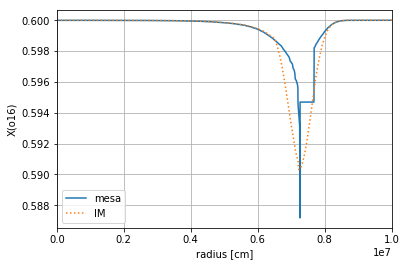

In [15]:
element = 'o16'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.xlim(7.2e6,7.8e6)
#plt.xlim(585937.5,1367187.5)
plt.xlim(0.4,1e7)
plt.grid()
plt.legend()
plt.show()

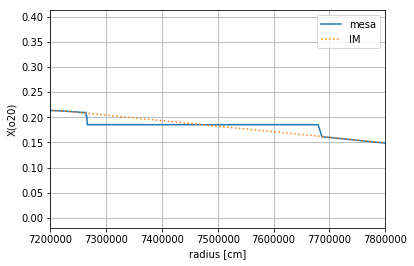

In [16]:
element = 'o20'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(7.2e6,7.8e6)
#plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

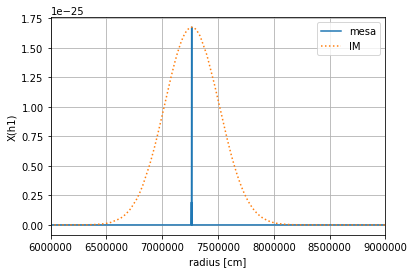

In [17]:
element = 'h1'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(6e6,9e6)
plt.grid()
plt.legend()
plt.savefig("X(h1).png")

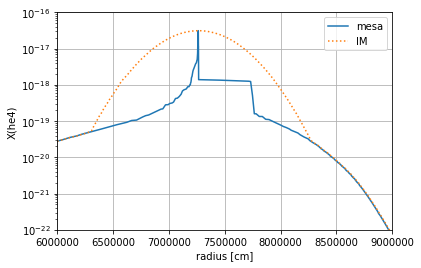

In [18]:
element = 'he4'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(6e6,9e6)
plt.ylim(1e-22,1e-16)
#plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

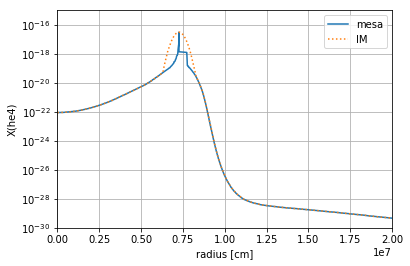

In [19]:
element = 'he4'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.xlim(0,0.2e8)
plt.ylim(1e-30,1e-15)
plt.savefig("X(he4).png")

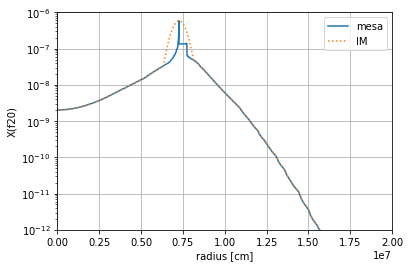

In [20]:
element = 'f20'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(0,0.2e8)
plt.ylim(1e-12,1e-6)
plt.grid()
plt.legend()
plt.savefig("X(f20).png")

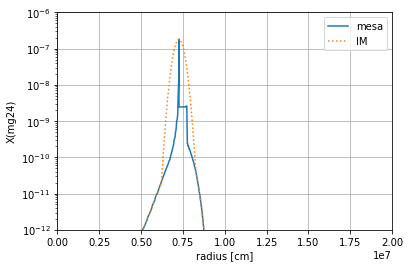

In [21]:
element = 'mg24'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.xlim(0,0.2e8)
plt.ylim(1e-12,1e-6)
plt.legend()
plt.savefig("X(mg24).png")

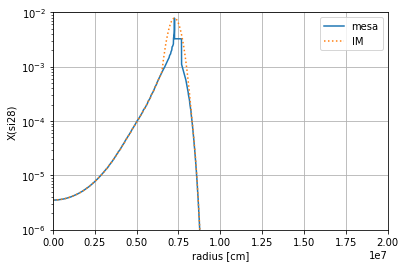

In [22]:
element = 'si28'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(0,0.2e8)
plt.ylim(1e-6,1e-2)
plt.grid()
plt.legend()
plt.savefig("X(si28).png")

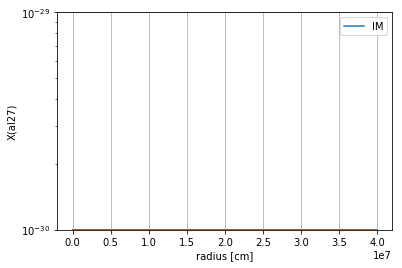

In [23]:
element = 'al27'

#y_axis = np.array(a[element])

#plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),'-',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.xlim(7.2e6,7.8e6)
#plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

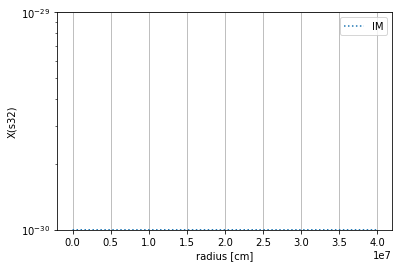

In [24]:
element = 's32'

#y_axis = np.array(a[element])

#plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

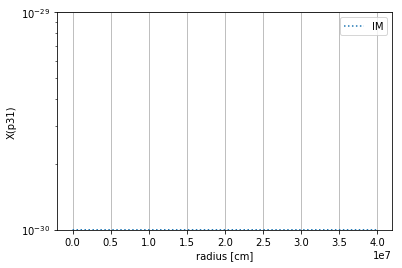

In [25]:
element = 'p31'

#y_axis = np.array(a[element])

#plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.show()

In [39]:
df.head()

,radius,density,temperature,pressure,ne20,o16,o20,mg24,f20,he4,al27,si28,s32,p31,h1
0,9765.625,8.348567e+09,6.565859e+08,7.367389e+27,0.007297,0.599995,0.392705,4.965020e-16,2.021117e-09,8.924924e-23,1.000000e-30,0.000004,1.000000e-30,1.000000e-30,1.000000e-30
1,29296.875,8.348559e+09,6.565902e+08,7.367382e+27,0.007298,0.599995,0.392704,4.966380e-16,2.021276e-09,8.926195e-23,1.000000e-30,0.000004,1.000000e-30,1.000000e-30,1.000000e-30
2,48828.125,8.348544e+09,6.565987e+08,7.367367e+27,0.007299,0.599995,0.392703,4.969120e-16,2.021597e-09,8.928756e-23,1.000000e-30,0.000004,1.000000e-30,1.000000e-30,1.000000e-30
3,68359.375,8.348521e+09,6.566115e+08,7.367344e+27,0.007301,0.599995,0.392701,4.973247e-16,2.022081e-09,8.932613e-23,1.000000e-30,0.000004,1.000000e-30,1.000000e-30,1.000000e-30
4,87890.625,8.348490e+09,6.566286e+08,7.367315e+27,0.007303,0.599995,0.392699,4.978744e-16,2.022725e-09,8.937746e-23,1.000000e-30,0.000004,1.000000e-30,1.000000e-30,1.000000e-30


In [40]:
df.to_csv("/Users/sailor/Desktop/asro_work/test/csv_result/rm_plateo.csv",index = False)

In [25]:
df.shape[0]

10240

In [10]:
df.head()


,radius,density,temperature,pressure,ne20,o16,o20,mg24,f20,he4,al27,si28,s32,p31,h1
0,97656.25,8.348474e+09,6.566385e+08,7.367299e+27,0.007305,0.599995,0.392697,4.981926e-16,2.023097e-09,8.940718e-23,1.000000e-30,0.000004,1.000000e-30,1.000000e-30,1.000000e-30
1,292968.75,8.347710e+09,6.570639e+08,7.366555e+27,0.007367,0.599995,0.392634,5.120857e-16,2.039181e-09,9.069591e-23,1.000000e-30,0.000004,1.000000e-30,1.000000e-30,1.000000e-30
2,488281.25,8.346180e+09,6.579116e+08,7.365069e+27,0.007493,0.599995,0.392508,5.408882e-16,2.071501e-09,9.331781e-23,1.000000e-30,0.000004,1.000000e-30,1.000000e-30,1.000000e-30
3,683593.75,8.343877e+09,6.591974e+08,7.362840e+27,0.007688,0.599994,0.392314,5.875792e-16,2.121249e-09,9.743612e-23,1.000000e-30,0.000004,1.000000e-30,1.000000e-30,1.000000e-30
4,878906.25,8.340799e+09,6.609049e+08,7.359871e+27,0.007952,0.599994,0.392049,6.556228e-16,2.188665e-09,1.031789e-22,1.000000e-30,0.000004,1.000000e-30,1.000000e-30,1.000000e-30


In [15]:
df[df["temperature"]>1.1e9]

,radius,density,temperature,pressure,ne20,o16,o20,mg24,f20,he4,al27,si28,s32,p31,h1
36,7128906.25,7.645092e+09,1.118862e+09,6.901353e+27,0.181338,0.591502,0.219895,1.548604e-07,5.502321e-07,2.741902e-17,1.000000e-30,0.007265,1.000000e-30,1.000000e-30,1.431954e-25
37,7324218.75,7.596279e+09,1.123350e+09,6.877459e+27,0.200101,0.590654,0.201523,1.758004e-07,5.788595e-07,3.045315e-17,1.000000e-30,0.007721,1.000000e-30,1.000000e-30,1.625581e-25
38,7519531.25,7.543750e+09,1.105442e+09,6.853165e+27,0.220915,0.592881,0.180150,1.061014e-07,4.725345e-07,2.003990e-17,1.000000e-30,0.006053,1.000000e-30,1.000000e-30,9.810922e-26


In [16]:
df[df["density"]<1.e7]

,radius,density,temperature,pressure,ne20,o16,o20,mg24,f20,he4,al27,si28,s32,p31,h1
611,1.194336e+08,9.809848e+06,3.378807e+08,8.331699e+23,0.4,0.6,1.000000e-30,1.242082e-27,1.000000e-30,1.000000e-30,1.000000e-30,3.017462e-27,1.000000e-30,1.000000e-30,1.000000e-30
612,1.196289e+08,9.604947e+06,3.412390e+08,8.087647e+23,0.4,0.6,1.000000e-30,1.293854e-27,1.000000e-30,1.000000e-30,1.000000e-30,3.147699e-27,1.000000e-30,1.000000e-30,1.000000e-30
613,1.198242e+08,9.403922e+06,3.438652e+08,7.849448e+23,0.4,0.6,1.000000e-30,1.336897e-27,1.000000e-30,1.000000e-30,1.000000e-30,3.254057e-27,1.000000e-30,1.000000e-30,1.000000e-30
614,1.200195e+08,9.205622e+06,3.469125e+08,7.616984e+23,0.4,0.6,1.000000e-30,1.386901e-27,1.000000e-30,1.000000e-30,1.000000e-30,3.380207e-27,1.000000e-30,1.000000e-30,1.000000e-30
615,1.202148e+08,9.010923e+06,3.494233e+08,7.390141e+23,0.4,0.6,1.000000e-30,1.430577e-27,1.000000e-30,1.000000e-30,1.000000e-30,3.488747e-27,1.000000e-30,1.000000e-30,1.000000e-30
616,1.204102e+08,8.819183e+06,3.520240e+08,7.168806e+23,0.4,0.6,1.000000e-30,1.475683e-27,1.000000e-30,1.000000e-30,1.000000e-30,3.601699e-27,1.000000e-30,1.000000e-30,1.000000e-30
617,1.206055e+08,8.630359e+06,3.547236e+08,6.952871e+23,0.4,0.6,1.000000e-30,1.522889e-27,1.000000e-30,1.000000e-30,1.000000e-30,3.720281e-27,1.000000e-30,1.000000e-30,1.000000e-30
618,1.208008e+08,8.444483e+06,3.574517e+08,6.742233e+23,0.4,0.6,1.000000e-30,1.575246e-27,1.000000e-30,1.000000e-30,1.000000e-30,3.851500e-27,1.000000e-30,1.000000e-30,1.000000e-30
619,1.209961e+08,8.262257e+06,3.594169e+08,6.536779e+23,0.4,0.6,1.000000e-30,1.609879e-27,1.000000e-30,1.000000e-30,1.000000e-30,3.938262e-27,1.000000e-30,1.000000e-30,1.000000e-30
620,1.211914e+08,8.082298e+06,3.620433e+08,6.336406e+23,0.4,0.6,1.000000e-30,1.661231e-27,1.000000e-30,1.000000e-30,1.000000e-30,4.067836e-27,1.000000e-30,1.000000e-30,1.000000e-30
